<a href="https://colab.research.google.com/github/whyeon92/ESAA_YB/blob/Online_Quiz/ESAA_Online_Quiz0405_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 모듈 및 데이터 로드
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer()

# x, y 데이터 생성
X = data.data

# 악성을 1, 양성을 0으로
y = 1 - data.target

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 축소
X = X[:, :10]

# 로지스틱 회귀 모델 생성
model_lor = LogisticRegression(solver = 'lbfgs')
model_lor.fit(X,y)
y_pred = model_lor.predict(X)

In [2]:
#밑에서 사용할 평가지표 전부 한번에 임포트
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

* 오차 행렬(혼동 행렬) 생성

In [3]:
# 종속 변수와 예측 결과로 혼동 행렬 생성
confusion_matrix(y, y_pred)

array([[337,  20],
       [ 30, 182]])

* 정확도

In [4]:
accuracy_score(y, y_pred)

0.9121265377855887

* 정밀도

In [5]:
precision_score(y, y_pred)

0.900990099009901

* 재현율

In [6]:
recall_score(y, y_pred)

0.8584905660377359

* F1 score

In [7]:
f1_score(y, y_pred)

0.8792270531400966

* 예측 확률(pred_proba) : 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣는다 가정.

In [21]:
from sklearn.preprocessing import Binarizer
pred_proba = model_lor.predict_proba(X)[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold = 0.9).fit(pred_proba)
y_pred2 = binarizer.transform(pred_proba)

In [23]:
# y과 y_pred2의 혼동행렬, 정확도, 정밀도, 재현율, f1 score 구하기
print('혼동행렬 \n', confusion_matrix(y, y_pred2))
print('정확도: ', accuracy_score(y, y_pred2))
print('정밀도: ', precision_score(y, y_pred2))
print('재현율: ', recall_score(y, y_pred2))
print('f1 score: ', f1_score(y, y_pred2))

혼동행렬 
 [[356   1]
 [ 73 139]]
정확도:  0.8699472759226714
정밀도:  0.9928571428571429
재현율:  0.6556603773584906
f1 score:  0.7897727272727273


* ROC 곡선 시각화

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import numpy as np

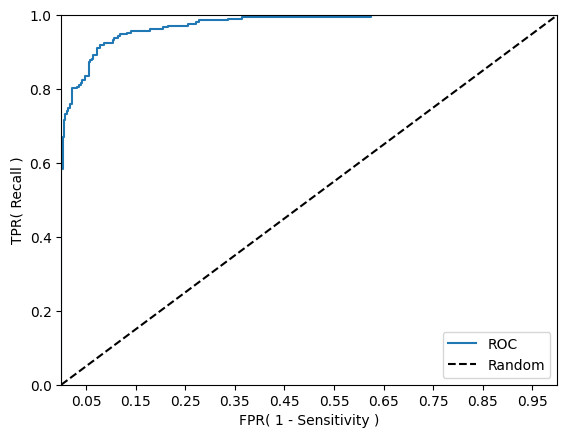

In [20]:
pred_proba_c1 = model_lor.predict_proba(X)[:, 1]
fprs, tprs, thresholds = roc_curve(y, pred_proba_c1)
plt.plot(fprs, tprs, label = 'ROC')
plt.plot([0, 1], [0, 1], 'k--', label = 'Random')
start, end = plt.xlim()
plt.xticks(np.round(np.arange(start, end, 0.1), 2))
plt.xlim(0, 1);plt.ylim(0, 1)
plt.xlabel('FPR( 1 - Sensitivity )');plt.ylabel('TPR( Recall )')
plt.legend()

* ROC AUC 값

In [14]:
roc_auc_score(y, y_pred)

0.9012340785370753